In [ ]:
!pip install mne
!pip install matplotlib
!pip intsall tqdm

In [1]:
import os
import mne
import matplotlib.pyplot as plt

In [10]:
mne.set_config('MNE_DATASETS_SAMPLE_PATH', os.path.expanduser('~/mne_data'))
mne.datasets.sample.data_path()  # Download the sample dataset if not already present

100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.30TB/s]
Untarring contents of '/Users/hamzaabdelhedi/mne_data/MNE-sample-data-processed.tar.gz' to '/Users/hamzaabdelhedi/mne_data'


Download complete in 04m43s (1576.2 MB)


PosixPath('/Users/hamzaabdelhedi/mne_data/MNE-sample-data')

In [5]:
chemin_donnees = os.path.join(mne.datasets.sample.data_path(), 'MEG', 'sample', 'sample_audvis_raw.fif')

In [11]:
raw = mne.io.read_raw_fif(chemin_donnees, preload=True)

Opening raw data file /Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [12]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

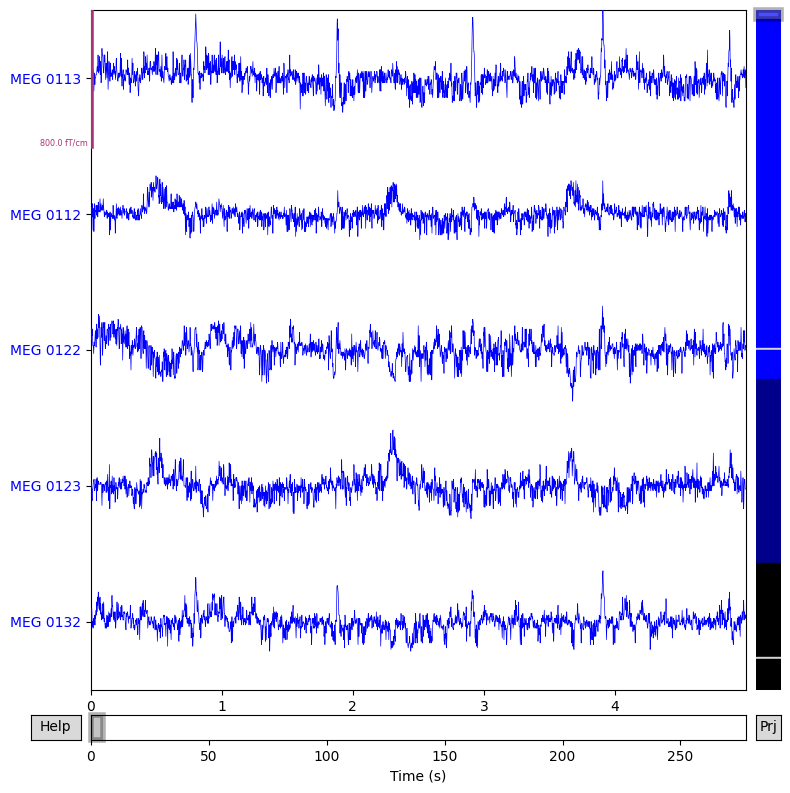

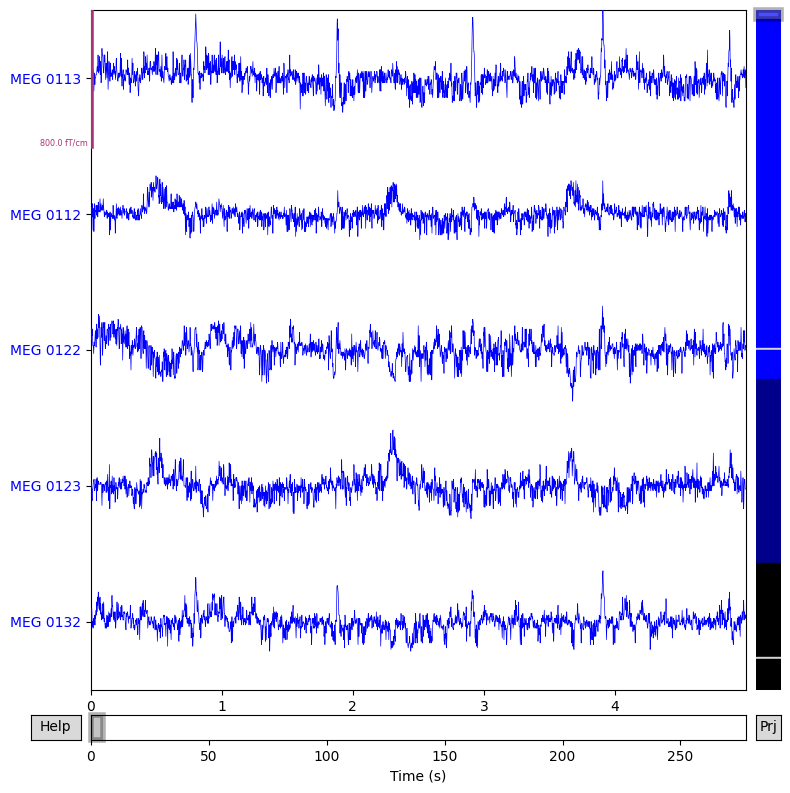

In [17]:
raw.plot(n_channels=5, duration=5)

In [19]:
freq_echan = raw.info['sfreq']

In [21]:
print(f"Sampling frequency: {freq_echan} Hz")

Sampling frequency: 600.614990234375 Hz


In [22]:
# taille de matrice de données
print(f"{len(raw.ch_names)} channels and {raw.n_times} time points")

376 channels and 166800 time points


In [23]:
# duree totale de l'enregistrement
duree = raw.n_times / freq_echan
print(f"Total recording duration: {duree / 60:.2f} minutes")

Total recording duration: 4.63 minutes


In [29]:
meg_only_raw = raw.copy().pick_types(meg=True,eeg=False,stim=True,eog=True,        exclude='bads')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [30]:
# drop specific channels
raw.drop_channels(['MEG 2443', 'EEG 053'])  #

<Raw | sample_audvis_raw.fif, 374 x 166800 (277.7 s), ~479.2 MiB, data loaded>

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/hamzaabdelhedi/Projects/Tutorials/PSY2007A2025/.venv_psy2007/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


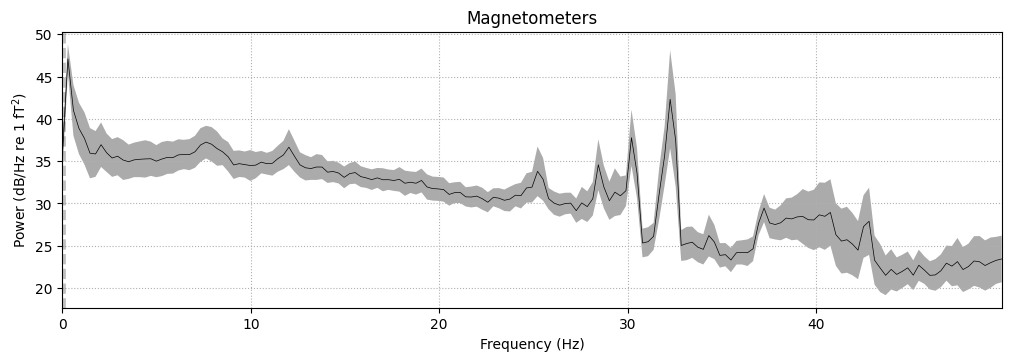

In [31]:
raw.copy().pick_types(meg="mag").plot_psd(fmax=50, average=True)

In [32]:
mne.datasets.kiloword.data_path()  # Download the kiloword dataset if not already present

100%|█████████████████████████████████████| 25.5M/25.5M [00:00<00:00, 10.9GB/s]
Untarring contents of '/Users/hamzaabdelhedi/mne_data/MNE-kiloword-data.tar.gz' to '/Users/hamzaabdelhedi/mne_data'


Download complete in 13s (24.3 MB)


PosixPath('/Users/hamzaabdelhedi/mne_data/MNE-kiloword-data')

In [ ]:
chemin_donnees_2 = os.path.join(mne.datasets.kiloword.data_path(), 'kword_metadata-epo.fif')

In [34]:
epochs = mne.read_epochs(chemin_donnees_2, preload=True)

Reading /Users/hamzaabdelhedi/mne_data/MNE-kiloword-data/kword_metadata-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     920.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
960 matching events found
No baseline correction applied
0 projection items activated


In [35]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fz, Cz, Pz, C3, Fp1, F7, T7, P7, O1, F3, FC5, CP5, P3, FC1, CP1, ...
 chs: 29 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 1970-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 29
 projs: []
 sfreq: 250.0 Hz
>

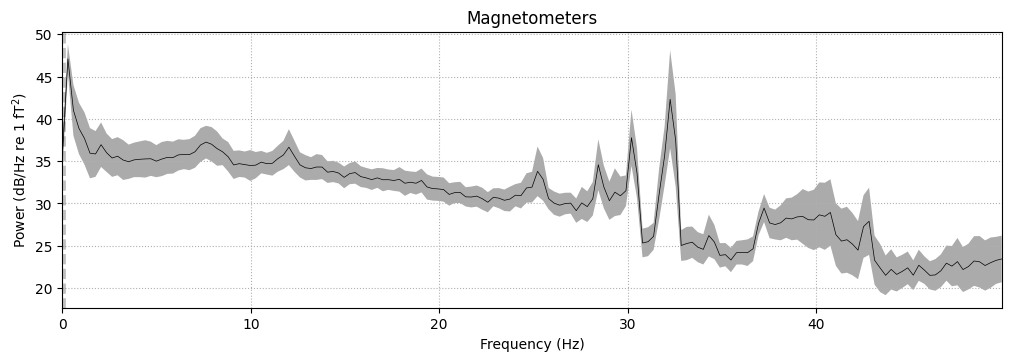

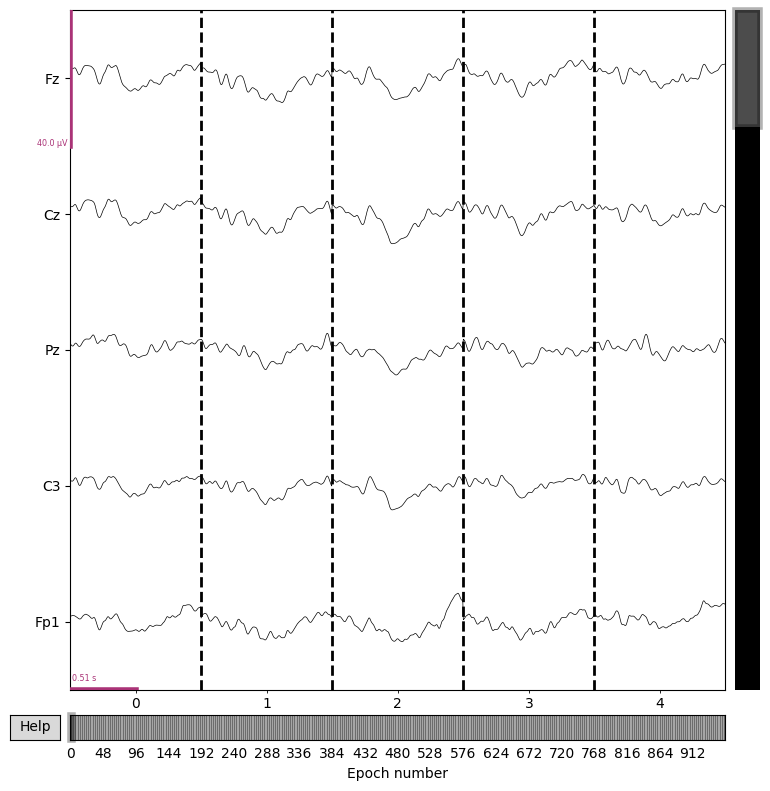

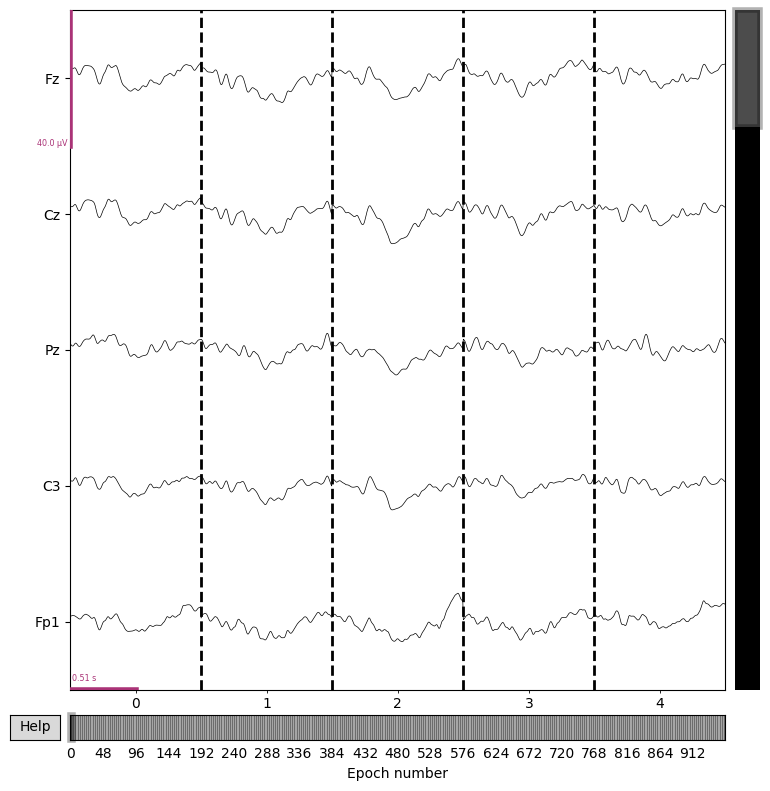

In [36]:
epochs.plot(n_epochs=5, n_channels=5)

In [40]:
epochs.get_data().shape

(960, 29, 256)

In [46]:
epochs.get_data()[891].shape

(29, 256)

In [44]:
epochs.event_id

{'spectra': 891,
 'loft': 763,
 'fire': 728,
 'judgment': 934,
 'scuffle': 662,
 'abstract': 221,
 'struggle': 931,
 'poetry': 353,
 'attitude': 197,
 'uncle': 65,
 'forest': 351,
 'japanese': 207,
 'virus': 321,
 'district': 920,
 'display': 399,
 'save': 495,
 'purpose': 145,
 'orgy': 287,
 'papa': 253,
 'sign': 241,
 'bench': 79,
 'velocity': 941,
 'emphasis': 933,
 'door': 492,
 'valuable': 213,
 'consort': 427,
 'scene': 56,
 'theory': 101,
 'contrast': 454,
 'wing': 750,
 'gill': 762,
 'turmoil': 651,
 'removal': 638,
 'evil': 16,
 'bush': 752,
 'musical': 637,
 'nerve': 558,
 'shot': 3,
 'pacifist': 709,
 'despite': 391,
 'vaccine': 191,
 'acreage': 171,
 'shade': 82,
 'extent': 827,
 'data': 244,
 'electron': 703,
 'mind': 247,
 'crux': 280,
 'briar': 86,
 'hash': 283,
 'friend': 105,
 'hazard': 363,
 'spit': 754,
 'hospital': 439,
 'document': 227,
 'majesty': 663,
 'heresy': 621,
 'pressure': 434,
 'clove': 813,
 'cusp': 526,
 'shelf': 804,
 'fate': 273,
 'fluency': 672,
 'mo

In [47]:
sample_data_evoked_file = os.path.join(mne.datasets.sample.data_path(), 'MEG', 'sample', 'sample_audvis-ave.fif')

In [52]:
evoked_list = mne.read_evokeds(sample_data_evoked_file)

Reading /Users/hamzaabdelhedi/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction a

In [53]:
evoked_list

[<Evoked | 'Left Auditory' (average, N=55), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.5 MiB>,
 <Evoked | 'Right Auditory' (average, N=61), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.5 MiB>,
 <Evoked | 'Left visual' (average, N=67), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.5 MiB>,
 <Evoked | 'Right visual' (average, N=58), -0.1998 – 0.49949 s, baseline off, 376 ch, ~4.5 MiB>]

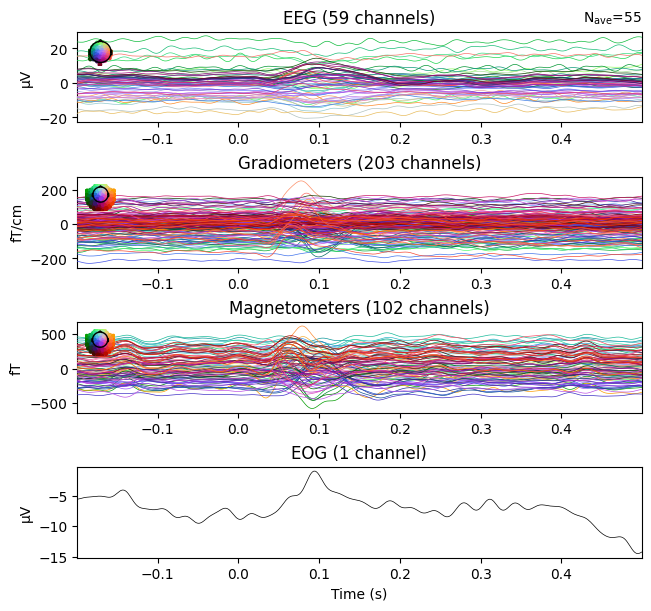

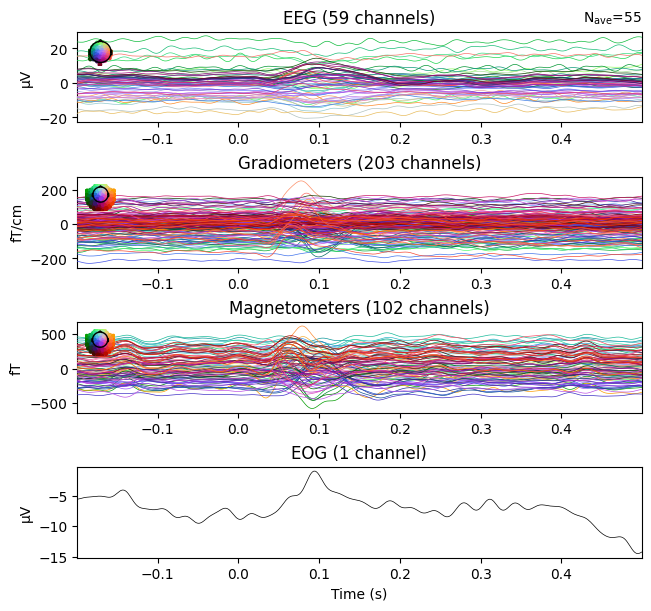

In [58]:
evoked_list[0].plot()

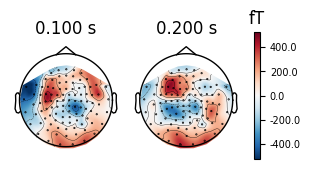

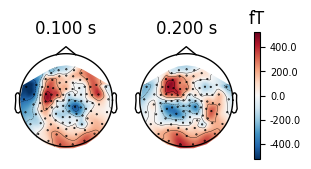

In [62]:
evoked_list[0].plot_topomap(times =[0.1, 0.2],
                           ch_type='mag', 
                           colorbar=True,
                           sphere=0.185)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/hamzaabdelhedi/Projects/Tutorials/PSY2007A2025/.venv_psy2007/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


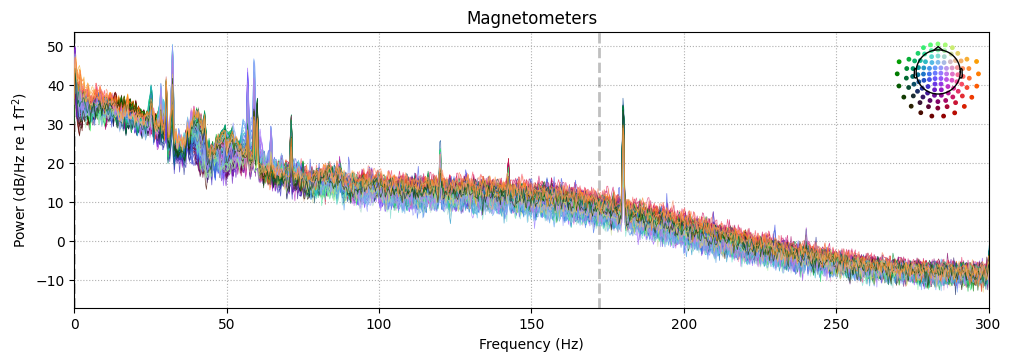

In [63]:
raw.plot_psd(tmax=50, picks="mag", average=False)

In [65]:
import numpy as np

In [66]:
np.arange(60, 181, 60)

array([ 60, 120, 180])

In [67]:
raw.notch_filter(np.arange(60, 181, 60), picks="mag", filter_length='auto', phase='zero')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 s)



<Raw | sample_audvis_raw.fif, 374 x 166800 (277.7 s), ~479.2 MiB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/hamzaabdelhedi/Projects/Tutorials/PSY2007A2025/.venv_psy2007/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


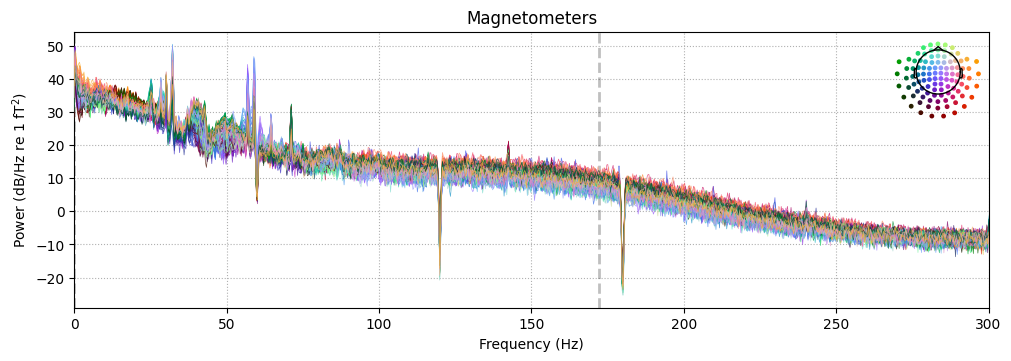

In [68]:
raw.plot_psd(tmax=50, picks="mag", average=False)

In [69]:
raw.filter(1.0, None, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1983 samples (3.302 s)



<Raw | sample_audvis_raw.fif, 374 x 166800 (277.7 s), ~479.2 MiB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/hamzaabdelhedi/Projects/Tutorials/PSY2007A2025/.venv_psy2007/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


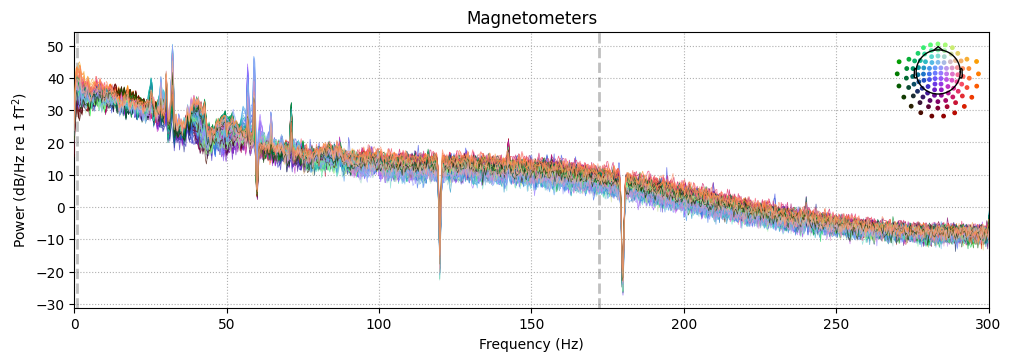

In [70]:
raw.plot_psd(tmax=50, picks="mag", average=False)

In [71]:
from mne.preprocessing import ICA

In [72]:
ica = ICA(n_components=25, method='fastica', random_state=42)

In [74]:
ica = ica.fit(raw.pick_types(meg=True, eeg=False, eog=True))

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 25 components
Fitting ICA took 8.2s.


In [75]:
ica.exclude = [0, 1]  

In [76]:
raw_clean = ica.apply(raw.copy())

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 2 ICA components
    Projecting back using 305 PCA components


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/hamzaabdelhedi/Projects/Tutorials/PSY2007A2025/.venv_psy2007/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


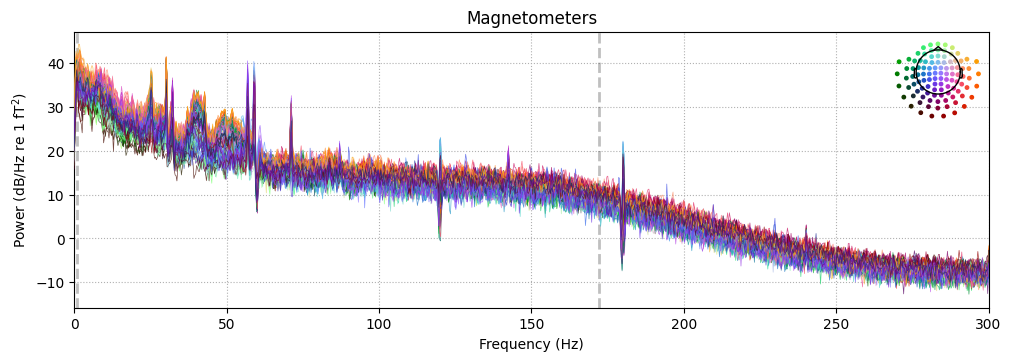

In [77]:
raw_clean.plot_psd(tmax=50, picks="mag", average=False)

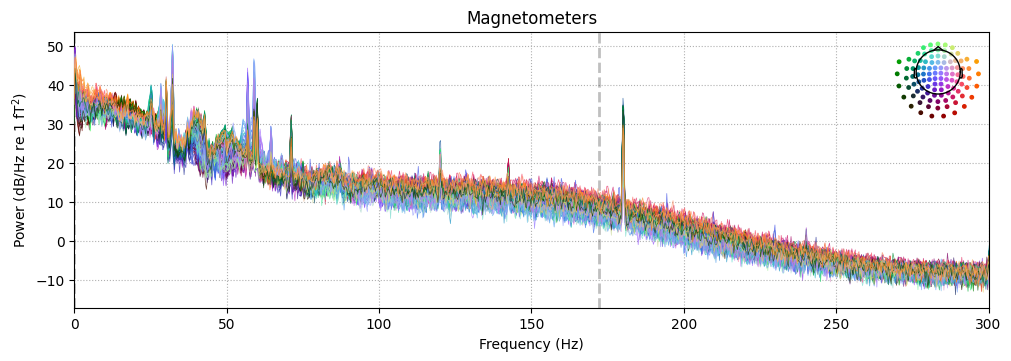

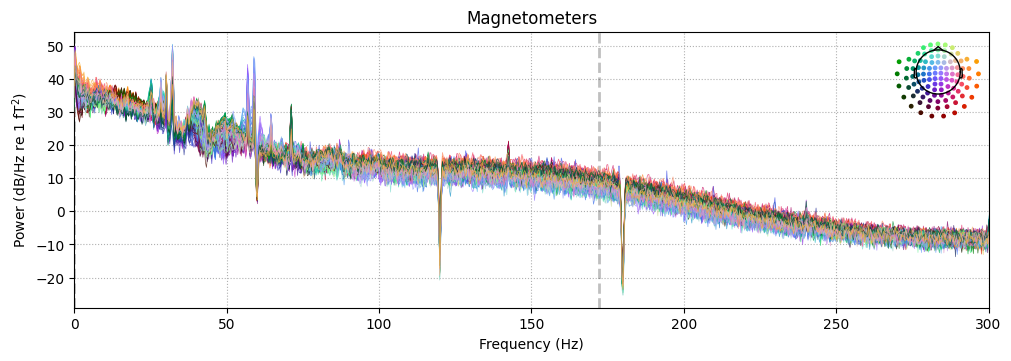

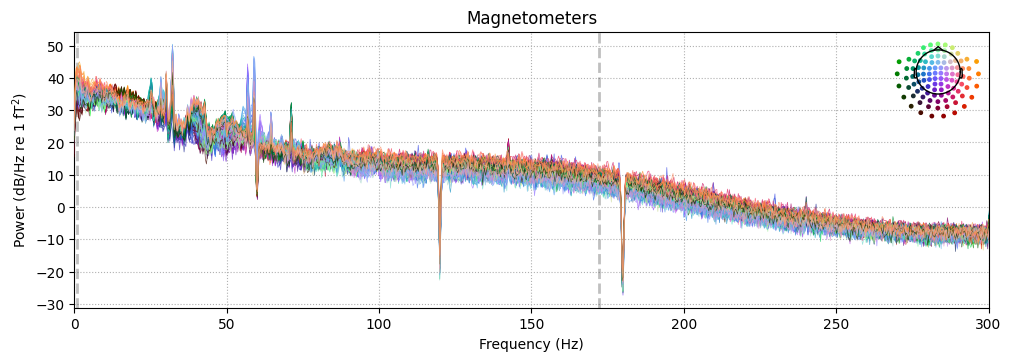

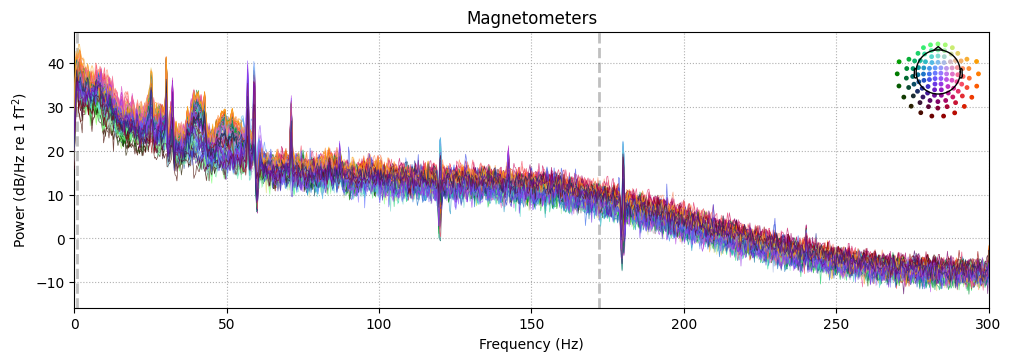

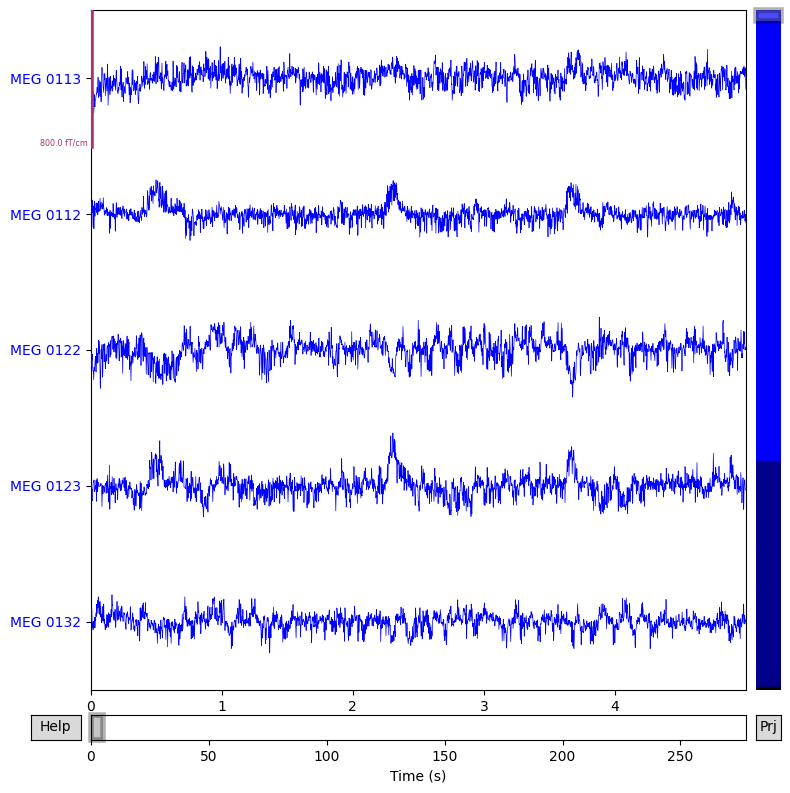

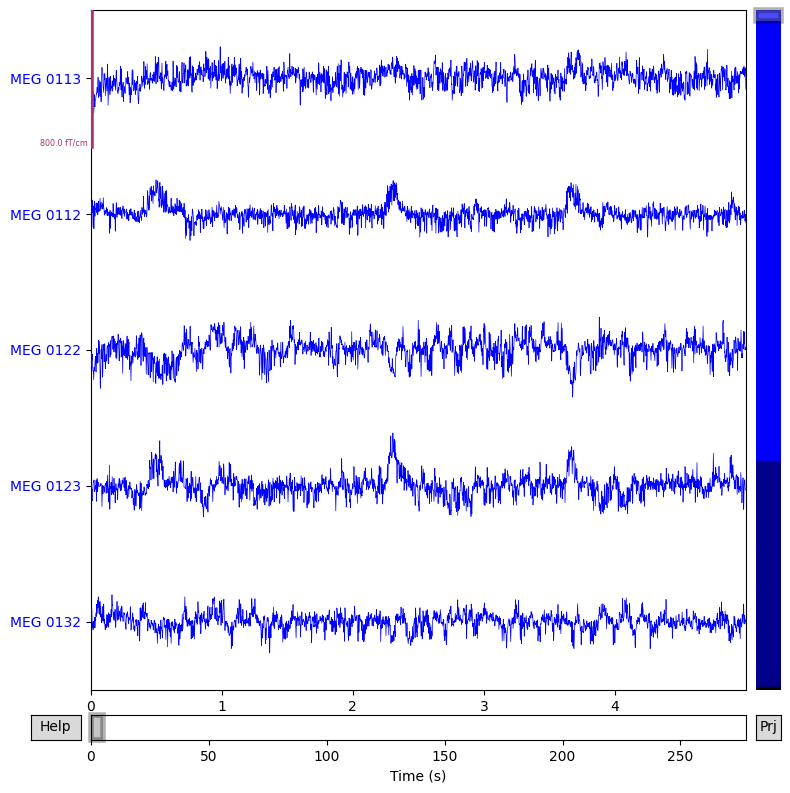

In [78]:
raw_clean.plot(n_channels=5, duration=5)